In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import Flatten
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.initializers import lecun_normal
from sklearn.model_selection import train_test_split

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert class labels to one-hot encoded vectors
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [ ]:
# Split the training dataset into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# self normalizing

In [ ]:
# Build the sequential model with self-normalizing layers
model_selfnorm = Sequential()
model_selfnorm.add(Flatten(input_shape=(32, 32, 3)))  # Input layer
model_selfnorm.add(Dense(50, activation='selu', kernel_initializer=lecun_normal()))  # First hidden layer
model_selfnorm.add(Dense(50, activation='selu', kernel_initializer=lecun_normal()))  # Second hidden layer
model_selfnorm.add(Dense(num_classes, activation='softmax'))  # Output layer

model_selfnorm.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

history_selfnorm = model_selfnorm.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=50)


Epoch 1/50
1250/1250 [==============================] - 8s 6ms/step - loss: 1.9372 - accuracy: 0.3080 - val_loss: 1.7797 - val_accuracy: 0.3710
Epoch 2/50
1250/1250 [==============================] - 7s 6ms/step - loss: 1.7737 - accuracy: 0.3711 - val_loss: 1.7133 - val_accuracy: 0.3896
Epoch 3/50
1250/1250 [==============================] - 7s 5ms/step - loss: 1.6957 - accuracy: 0.3992 - val_loss: 1.6919 - val_accuracy: 0.4016
Epoch 4/50
1250/1250 [==============================] - 7s 6ms/step - loss: 1.6468 - accuracy: 0.4178 - val_loss: 1.6250 - val_accuracy: 0.4222
Epoch 5/50
1250/1250 [==============================] - 7s 5ms/step - loss: 1.6088 - accuracy: 0.4288 - val_loss: 1.6069 - val_accuracy: 0.4247
Epoch 6/50
1250/1250 [==============================] - 8s 6ms/step - loss: 1.5802 - accuracy: 0.4396 - val_loss: 1.6264 - val_accuracy: 0.4258
Epoch 7/50
1250/1250 [==============================] - 6s 5ms/step - loss: 1.5513 - accuracy: 0.4505 - val_loss: 1.6040 - val_accuracy:

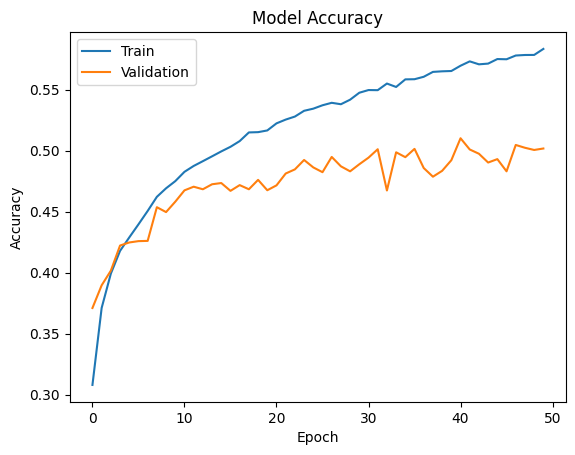

In [ ]:
plt.plot(history_selfnorm.history['accuracy'])
plt.plot(history_selfnorm.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

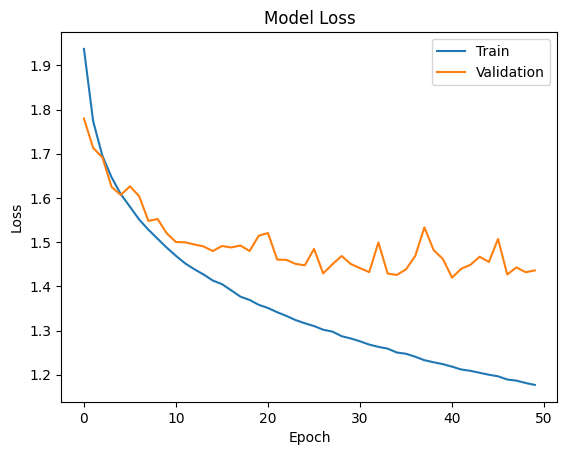

In [ ]:
plt.plot(history_selfnorm.history['loss'])
plt.plot(history_selfnorm.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model_selfnorm.evaluate(x_test, y_test, verbose=2)
print("SELF NORM Test loss:", test_loss)
print("SELF NORM Test accuracy:", test_acc)

313/313 - 1s - loss: 1.4181 - accuracy: 0.5005 - 618ms/epoch - 2ms/step
SELF NORM Test loss: 1.4181077480316162
SELF NORM Test accuracy: 0.5005000233650208


# batch normalizing

In [ ]:
model_batchnorm = Sequential()
model_batchnorm.add(Flatten(input_shape=(32, 32, 3)))  # Input layer
model_batchnorm.add(Dense(50, activation='relu', kernel_initializer=lecun_normal())) # First hidden layer
model_batchnorm.add(BatchNormalization())
model_batchnorm.add(Dense(50, activation='relu', kernel_initializer=lecun_normal()))  # Second hidden layer
model_batchnorm.add(BatchNormalization())
model_batchnorm.add(Dense(num_classes, activation='softmax'))  # Output layer

model_batchnorm.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

history_batchnorm = model_batchnorm.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=50)


Epoch 1/50
1250/1250 [==============================] - 10s 7ms/step - loss: 1.8222 - accuracy: 0.3558 - val_loss: 1.7087 - val_accuracy: 0.3988
Epoch 2/50
1250/1250 [==============================] - 9s 7ms/step - loss: 1.6668 - accuracy: 0.4150 - val_loss: 1.6343 - val_accuracy: 0.4172
Epoch 3/50
1250/1250 [==============================] - 9s 7ms/step - loss: 1.6030 - accuracy: 0.4363 - val_loss: 1.6769 - val_accuracy: 0.4127
Epoch 4/50
1250/1250 [==============================] - 7s 6ms/step - loss: 1.5554 - accuracy: 0.4516 - val_loss: 1.6828 - val_accuracy: 0.4108
Epoch 5/50
1250/1250 [==============================] - 7s 6ms/step - loss: 1.5417 - accuracy: 0.4545 - val_loss: 1.5973 - val_accuracy: 0.4357
Epoch 6/50
1250/1250 [==============================] - 7s 6ms/step - loss: 1.5101 - accuracy: 0.4656 - val_loss: 1.5454 - val_accuracy: 0.4563
Epoch 7/50
1250/1250 [==============================] - 9s 7ms/step - loss: 1.4822 - accuracy: 0.4766 - val_loss: 1.6020 - val_accuracy

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model_batchnorm.evaluate(x_test, y_test, verbose=2)
print("BATCH NORM Test loss:", test_loss)
print("BATCH NORM Test accuracy:", test_acc)

313/313 - 1s - loss: 1.5087 - accuracy: 0.4761 - 613ms/epoch - 2ms/step
BATCH NORM Test loss: 1.5087223052978516
BATCH NORM Test accuracy: 0.47609999775886536


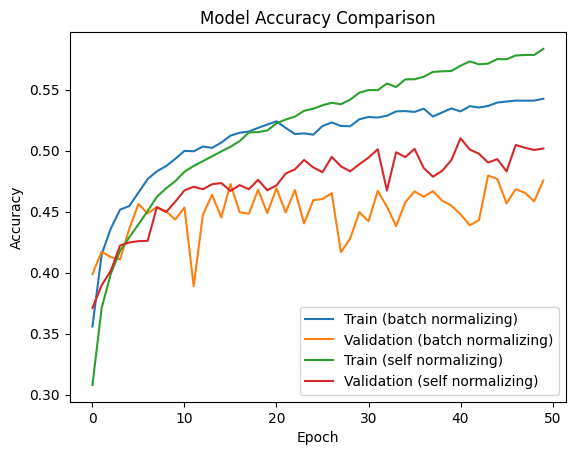

In [ ]:
plt.plot(history_batchnorm.history['accuracy'])
plt.plot(history_batchnorm.history['val_accuracy'])
plt.plot(history_selfnorm.history['accuracy'])
plt.plot(history_selfnorm.history['val_accuracy'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train (batch normalizing)', 'Validation (batch normalizing)', 'Train (self normalizing)', 'Validation (self normalizing)'], loc='lower right')
plt.show()

# Batch normalizing just for horse

In [ ]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert class labels to binary labels (horse vs. not horse)
y_train_horse = (y_train == 7).astype(int)
y_test_horse = (y_test == 7).astype(int)

x_train, _, y_train_horse, _ = train_test_split(x_train, y_train_horse, train_size=6000, stratify=y_train_horse, random_state=42)

x_train, x_val, y_train_horse, y_val_horse = train_test_split(x_train, y_train_horse, test_size=0.2, random_state=42)

In [ ]:
horse_model = Sequential()
horse_model.add(Flatten(input_shape=(32, 32, 3)))  # Input layer
horse_model.add(Dense(50, activation='selu', kernel_initializer=lecun_normal())) # First hidden layer
horse_model.add(Dense(50, activation='selu', kernel_initializer=lecun_normal()))  # Second hidden layer
horse_model.add(Dense(1, activation='sigmoid'))  # Output layer

horse_model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

history_horse = horse_model.fit(x_train, y_train_horse, validation_data=(x_val, y_val_horse), epochs=50)


Epoch 1/50
150/150 [==============================] - 2s 8ms/step - loss: 0.3424 - accuracy: 0.8983 - val_loss: 0.3119 - val_accuracy: 0.8967
Epoch 2/50
150/150 [==============================] - 1s 7ms/step - loss: 0.3021 - accuracy: 0.9023 - val_loss: 0.3058 - val_accuracy: 0.8950
Epoch 3/50
150/150 [==============================] - 1s 9ms/step - loss: 0.2944 - accuracy: 0.9017 - val_loss: 0.2978 - val_accuracy: 0.8975
Epoch 4/50
150/150 [==============================] - 1s 6ms/step - loss: 0.2842 - accuracy: 0.9027 - val_loss: 0.2949 - val_accuracy: 0.8950
Epoch 5/50
150/150 [==============================] - 1s 6ms/step - loss: 0.2781 - accuracy: 0.9042 - val_loss: 0.4130 - val_accuracy: 0.8442
Epoch 6/50
150/150 [==============================] - 1s 5ms/step - loss: 0.2795 - accuracy: 0.9042 - val_loss: 0.2868 - val_accuracy: 0.8992
Epoch 7/50
150/150 [==============================] - 1s 5ms/step - loss: 0.2709 - accuracy: 0.9062 - val_loss: 0.3105 - val_accuracy: 0.8867
Epoch 

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = horse_model.evaluate(x_test, y_test_horse, verbose=2)
print("Horse Test loss:", test_loss)
print("Horse Test accuracy:", test_acc)

313/313 - 1s - loss: 0.2583 - accuracy: 0.9092 - 595ms/epoch - 2ms/step
Horse Test loss: 0.2583127021789551
Horse Test accuracy: 0.9092000126838684


# Transfer pre-trained model

In [ ]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Split the dataset into training, validation, and test sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


# Convert class labels to binary labels (horse vs. not horse)
y_train = (y_train == 7).astype(int)
y_test = (y_test == 7).astype(int)
y_val = (y_val == 7).astype(int)

# Freeze the hidden layers of the previous model
for layer in model_selfnorm.layers:
    layer.trainable = False
    
# Create a new model and add the frozen layers
trans_model = Sequential()
trans_model.add(model_selfnorm)
trans_model.add(Dense(1, activation='sigmoid'))  # Output layer for the new dataset


trans_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

trans_history = trans_model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=50)

Epoch 1/50
1250/1250 [==============================] - 6s 4ms/step - loss: 0.4893 - accuracy: 0.8126 - val_loss: 0.3237 - val_accuracy: 0.9124
Epoch 2/50
1250/1250 [==============================] - 4s 3ms/step - loss: 0.2600 - accuracy: 0.9212 - val_loss: 0.2481 - val_accuracy: 0.9191
Epoch 3/50
1250/1250 [==============================] - 4s 3ms/step - loss: 0.2117 - accuracy: 0.9299 - val_loss: 0.2276 - val_accuracy: 0.9234
Epoch 4/50
1250/1250 [==============================] - 5s 4ms/step - loss: 0.1921 - accuracy: 0.9350 - val_loss: 0.2189 - val_accuracy: 0.9245
Epoch 5/50
1250/1250 [==============================] - 5s 4ms/step - loss: 0.1814 - accuracy: 0.9379 - val_loss: 0.2150 - val_accuracy: 0.9253
Epoch 6/50
1250/1250 [==============================] - 4s 3ms/step - loss: 0.1755 - accuracy: 0.9393 - val_loss: 0.2138 - val_accuracy: 0.9245
Epoch 7/50
1250/1250 [==============================] - 6s 5ms/step - loss: 0.1721 - accuracy: 0.9407 - val_loss: 0.2138 - val_accuracy:

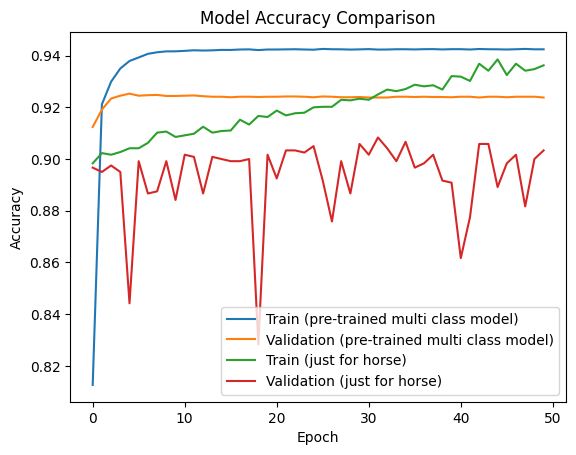

In [ ]:
plt.plot(trans_history.history['accuracy'])
plt.plot(trans_history.history['val_accuracy'])
plt.plot(history_horse.history['accuracy'])
plt.plot(history_horse.history['val_accuracy'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train (pre-trained multi class model)', 'Validation (pre-trained multi class model)', 'Train (just for horse)', 'Validation (just for horse)'], loc='lower right')
plt.show()

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = trans_model.evaluate(x_test, y_test_horse, verbose=2)
print("pre-trained multi class model Test for horse loss:", test_loss)
print("pre-trained multi class model Test for horse accuracy:", test_acc)

313/313 - 1s - loss: 0.2151 - accuracy: 0.9263 - 772ms/epoch - 2ms/step
pre-trained multi class model Test for horse loss: 0.21505969762802124
pre-trained multi class model Test for horse accuracy: 0.9262999892234802


# unfreeze to learn just for horses

In [ ]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert class labels to one-hot encoded vectors
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Split the dataset into training, validation, and test sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Freeze the hidden layers of the previous model
for layer in model_selfnorm.layers:
    layer.trainable = True
    

model_selfnorm.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

trans_history1 = model_selfnorm.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=50)

Epoch 1/50
1250/1250 [==============================] - 10s 8ms/step - loss: 1.1752 - accuracy: 0.5824 - val_loss: 1.4779 - val_accuracy: 0.4912
Epoch 2/50
1250/1250 [==============================] - 6s 5ms/step - loss: 1.1694 - accuracy: 0.5861 - val_loss: 1.4345 - val_accuracy: 0.5071
Epoch 3/50
1250/1250 [==============================] - 7s 6ms/step - loss: 1.1658 - accuracy: 0.5871 - val_loss: 1.4278 - val_accuracy: 0.5168
Epoch 4/50
1250/1250 [==============================] - 6s 5ms/step - loss: 1.1630 - accuracy: 0.5860 - val_loss: 1.4342 - val_accuracy: 0.5084
Epoch 5/50
1250/1250 [==============================] - 7s 6ms/step - loss: 1.1544 - accuracy: 0.5899 - val_loss: 1.4674 - val_accuracy: 0.4929
Epoch 6/50
1250/1250 [==============================] - 6s 5ms/step - loss: 1.1546 - accuracy: 0.5915 - val_loss: 1.4372 - val_accuracy: 0.5060
Epoch 7/50
1250/1250 [==============================] - 9s 7ms/step - loss: 1.1518 - accuracy: 0.5908 - val_loss: 1.4477 - val_accuracy

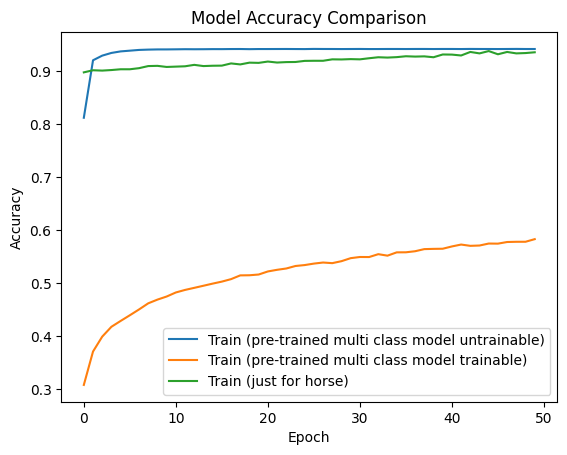

In [ ]:
plt.plot(trans_history.history['accuracy'])

plt.plot(history_selfnorm.history['accuracy'])

plt.plot(history_horse.history['accuracy'])

plt.title('Model Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train (pre-trained multi class model untrainable)',
            'Train (pre-trained multi class model trainable)',
            'Train (just for horse)'])
plt.show()

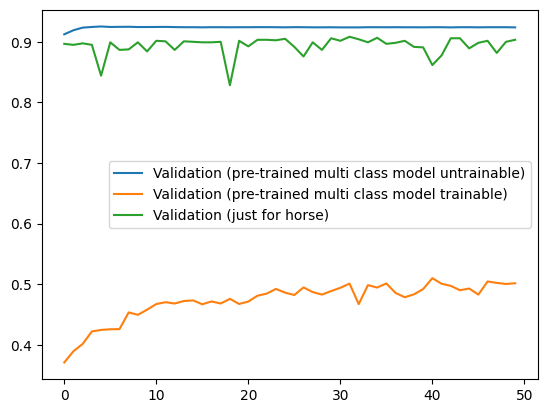

In [ ]:
plt.plot(trans_history.history['val_accuracy'])
plt.plot(history_selfnorm.history['val_accuracy'])
plt.plot(history_horse.history['val_accuracy'])

plt.legend(['Validation (pre-trained multi class model untrainable)',
            'Validation (pre-trained multi class model trainable)',
            'Validation (just for horse)'])
plt.show()

# diffrent optimizer with constant learning rate

In [ ]:
import keras

model = keras.models.Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))  # Input layer
model.add(Dense(50, activation='selu', kernel_initializer=lecun_normal()))  # First hidden layer
model.add(Dense(50, activation='selu', kernel_initializer=lecun_normal()))  # Second hidden layer
model.add(Dense(10, activation='softmax'))  # Output layer


# Compile the model with different optimizers
optimizers = {
    'SGD': keras.optimizers.SGD(learning_rate=0.01),
    'SGD with momentum': keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    'Nesterov SGD with momentum': keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True),
    'AdaGrad': keras.optimizers.Adagrad(learning_rate=0.01),
    'Adam': keras.optimizers.Adam(learning_rate=0.01),
    'Nadam with constant learning rate': keras.optimizers.Nadam(learning_rate=0.01)
}


# Train the model with different optimizers
epochs = 50
batch_size = 64
history = {}

for optimizer_name, optimizer in optimizers.items():
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    optimizer_history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=epochs, batch_size=batch_size)
    history[optimizer_name] = optimizer_history


Epoch 1/50
625/625 [==============================] - 6s 9ms/step - loss: 0.3116 - accuracy: 0.2273 - val_loss: 0.2977 - val_accuracy: 0.2674
Epoch 2/50
625/625 [==============================] - 4s 7ms/step - loss: 0.2920 - accuracy: 0.3018 - val_loss: 0.2877 - val_accuracy: 0.3205
Epoch 3/50
625/625 [==============================] - 6s 9ms/step - loss: 0.2850 - accuracy: 0.3305 - val_loss: 0.2828 - val_accuracy: 0.3336
Epoch 4/50
625/625 [==============================] - 4s 7ms/step - loss: 0.2808 - accuracy: 0.3464 - val_loss: 0.2793 - val_accuracy: 0.3465
Epoch 5/50
625/625 [==============================] - 4s 7ms/step - loss: 0.2779 - accuracy: 0.3538 - val_loss: 0.2767 - val_accuracy: 0.3559
Epoch 6/50
625/625 [==============================] - 5s 8ms/step - loss: 0.2756 - accuracy: 0.3642 - val_loss: 0.2749 - val_accuracy: 0.3622
Epoch 7/50
625/625 [==============================] - 4s 6ms/step - loss: 0.2737 - accuracy: 0.3692 - val_loss: 0.2732 - val_accuracy: 0.3657
Epoch 

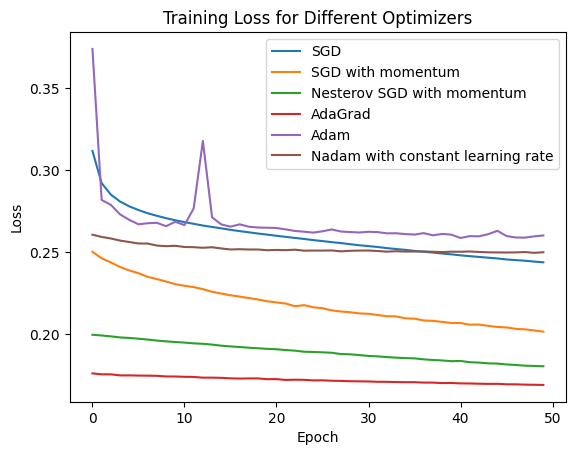

In [ ]:
for optimizer_name, optimizer_history in history.items():
    plt.plot(optimizer_history.history['loss'])
plt.title('Training Loss for Different Optimizers')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(list(history.keys()))
plt.show()


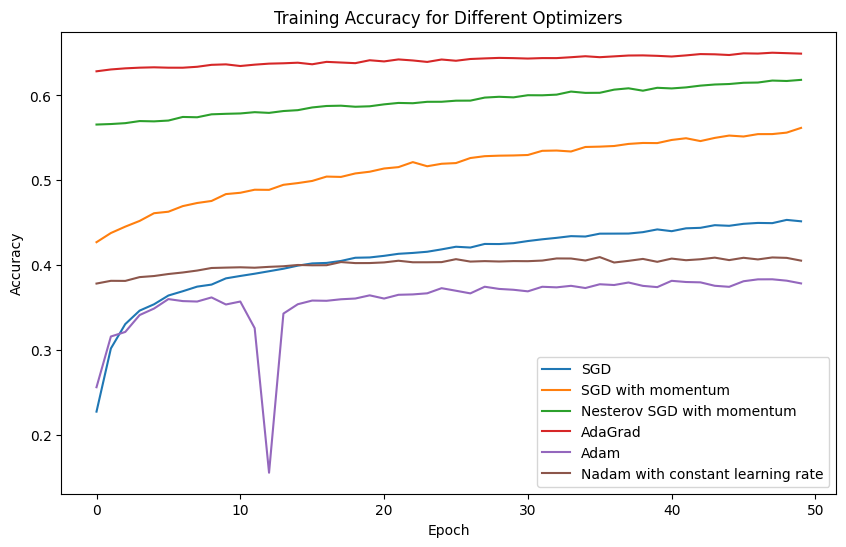

In [ ]:
plt.figure(figsize=(10, 6))
for optimizer_name, optimizer_history in history.items():
    plt.plot(optimizer_history.history['accuracy'])
plt.title('Training Accuracy for Different Optimizers')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(list(history.keys()))
plt.show()

# different regularizations

In [ ]:
regularizers = {
    'No Regularization': None,
    'Dropout': 'dropout',
    'L1-L2 Regularization': 'l1_l2',
    'Both': 'dropout & l1_l2'
}

history = {}

for regularization_name, regularization_type in regularizers.items():
    if regularization_type == 'dropout':
        model.layers[1].rate = 0.2  # Enable Dropout regularization
        model.layers[3].rate = 0.2  # Enable Dropout regularization
    elif regularization_type == 'l1_l2':
        model.layers[1].kernel_regularizer = keras.regularizers.L1L2(l1=0.01, l2=0.01)  # Enable L1-L2 regularization
        model.layers[3].kernel_regularizer = keras.regularizers.L1L2(l1=0.01, l2=0.01)  # Enable L1-L2 regularization
    elif regularization_type == 'Both':
        model.layers[1].rate = 0.2  # Enable Dropout regularization
        model.layers[3].rate = 0.2  # Enable Dropout regularization
        model.layers[1].kernel_regularizer = keras.regularizers.L1L2(l1=0.01, l2=0.01)  # Enable L1-L2 regularization
        model.layers[3].kernel_regularizer = keras.regularizers.L1L2(l1=0.01, l2=0.01)  # Enable L1-L2 regularization

    regularization_history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=50, batch_size=64)
    history[regularization_name] = regularization_history

# Evaluate the model on the test set with different regularizations
test_acc = {}

for regularization_name in regularizers.keys():
    test_loss, accuracy = model.evaluate(x_test, y_test, verbose=2)
    test_acc[regularization_name] = accuracy

Epoch 1/50
625/625 [==============================] - 7s 11ms/step - loss: 0.7517 - accuracy: 0.7311 - val_loss: 2.3691 - val_accuracy: 0.4561
Epoch 2/50
625/625 [==============================] - 7s 10ms/step - loss: 0.7608 - accuracy: 0.7267 - val_loss: 2.2851 - val_accuracy: 0.4634
Epoch 3/50
625/625 [==============================] - 10s 16ms/step - loss: 0.7564 - accuracy: 0.7276 - val_loss: 2.3409 - val_accuracy: 0.4547
Epoch 4/50
625/625 [==============================] - 10s 15ms/step - loss: 0.7555 - accuracy: 0.7269 - val_loss: 2.3318 - val_accuracy: 0.4609
Epoch 5/50
625/625 [==============================] - 9s 14ms/step - loss: 0.7539 - accuracy: 0.7298 - val_loss: 2.3195 - val_accuracy: 0.4617
Epoch 6/50
625/625 [==============================] - 6s 10ms/step - loss: 0.7526 - accuracy: 0.7301 - val_loss: 2.3508 - val_accuracy: 0.4587
Epoch 7/50
625/625 [==============================] - 5s 8ms/step - loss: 0.7525 - accuracy: 0.7323 - val_loss: 2.3401 - val_accuracy: 0.457

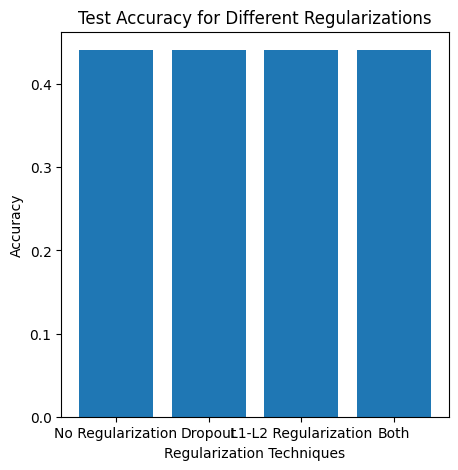

In [ ]:
# Plot accuracy for different regularizations
plt.figure(figsize=(5, 5))
x = np.arange(len(regularizers))
plt.bar(x, list(test_acc.values()), align='center')
plt.xticks(x, list(test_acc.keys()))
plt.title('Test Accuracy for Different Regularizations')
plt.xlabel('Regularization Techniques')
plt.ylabel('Accuracy')
plt.show()

# 

In [ ]:
model = keras.models.Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))  # Input layer
model.add(Dense(50, activation='selu', kernel_initializer=lecun_normal()))  # First hidden layer
keras.layers.Dropout(0.2)
model.add(Dense(50, activation='selu', kernel_initializer=lecun_normal()))  # Second hidden layer
keras.layers.Dropout(0.2)
model.add(Dense(10, activation='softmax'))  # Output layer

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
mc_history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=50, batch_size=64)
history['Monte Carlo'] = mc_history

Epoch 1/50
625/625 [==============================] - 7s 10ms/step - loss: 1.9334 - accuracy: 0.3153 - val_loss: 1.7951 - val_accuracy: 0.3577
Epoch 2/50
625/625 [==============================] - 5s 8ms/step - loss: 1.7342 - accuracy: 0.3850 - val_loss: 1.6975 - val_accuracy: 0.3961
Epoch 3/50
625/625 [==============================] - 6s 10ms/step - loss: 1.6677 - accuracy: 0.4040 - val_loss: 1.6291 - val_accuracy: 0.4205
Epoch 4/50
625/625 [==============================] - 5s 8ms/step - loss: 1.6223 - accuracy: 0.4227 - val_loss: 1.6674 - val_accuracy: 0.3932
Epoch 5/50
625/625 [==============================] - 6s 10ms/step - loss: 1.5929 - accuracy: 0.4351 - val_loss: 1.6024 - val_accuracy: 0.4306
Epoch 6/50
625/625 [==============================] - 5s 8ms/step - loss: 1.5465 - accuracy: 0.4485 - val_loss: 1.5656 - val_accuracy: 0.4413
Epoch 7/50
625/625 [==============================] - 6s 9ms/step - loss: 1.5264 - accuracy: 0.4597 - val_loss: 1.5249 - val_accuracy: 0.4611
Epo

In [ ]:
model_mcd = np.stack([model(x_test, training=True) for _ in range(50)])

In [ ]:
np.round(model.predict(x_test[:1]), 3)

1/1 [==============================] - 0s 72ms/step


array([[0.005, 0.103, 0.032, 0.372, 0.122, 0.221, 0.011, 0.012, 0.025,
        0.095]], dtype=float32)

In [ ]:
np.round(model_mcd[:,:1],3)

array([[[0.005, 0.103, 0.032, 0.372, 0.122, 0.221, 0.011, 0.012, 0.025,
         0.095]],

       [[0.005, 0.103, 0.032, 0.372, 0.122, 0.221, 0.011, 0.012, 0.025,
         0.095]],

       [[0.005, 0.103, 0.032, 0.372, 0.122, 0.221, 0.011, 0.012, 0.025,
         0.095]],

       [[0.005, 0.103, 0.032, 0.372, 0.122, 0.221, 0.011, 0.012, 0.025,
         0.095]],

       [[0.005, 0.103, 0.032, 0.372, 0.122, 0.221, 0.011, 0.012, 0.025,
         0.095]],

       [[0.005, 0.103, 0.032, 0.372, 0.122, 0.221, 0.011, 0.012, 0.025,
         0.095]],

       [[0.005, 0.103, 0.032, 0.372, 0.122, 0.221, 0.011, 0.012, 0.025,
         0.095]],

       [[0.005, 0.103, 0.032, 0.372, 0.122, 0.221, 0.011, 0.012, 0.025,
         0.095]],

       [[0.005, 0.103, 0.032, 0.372, 0.122, 0.221, 0.011, 0.012, 0.025,
         0.095]],

       [[0.005, 0.103, 0.032, 0.372, 0.122, 0.221, 0.011, 0.012, 0.025,
         0.095]],

       [[0.005, 0.103, 0.032, 0.372, 0.122, 0.221, 0.011, 0.012, 0.025,
         0.095]],


In [ ]:
class MonteCarloDropout(keras.layers.Dropout):
  def call(self, inputs):
    return super().call(inputs, training=True)